<h1> NLP</h1>

<b>Download and tokenise a book</b>

In [1]:
from urllib.request import urlopen
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
from urllib.request import urlopen
target_url0 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw = urlopen(target_url0).read().decode('utf-8')

In [3]:
type(book_raw)

str

In [4]:
len(book_raw)

3325128

In [5]:
book_raw[1:100]

'\r\nThe Project Gutenberg EBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of any'

Pre-processing of the text . First, to converty it into tokens

In [6]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
word_tokens  = word_tokenize(book_raw)
print(len(book_raw),len(word_tokens))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3325128 682012


In [7]:
book_raw[1:100]

'\r\nThe Project Gutenberg EBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of any'

In [8]:
print(word_tokens[1:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Les', 'Misérables', ',', 'by', 'Victor', 'Hugo', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', 'Title', ':', 'Les', 'Misérables', 'Complete', 'in', 'Five', 'Volumes', 'Author', ':', 'Victor', 'Hugo', 'Translator', ':', 'Isabel', 'F.', 'Hapgood', 'Release', 'Date', ':', 'June', '22', ',', '2008', '[', 'EBook', '#', '135', ']', 'Last', 'Updated', ':', 'May', '19', ',', '2019', 'Language', ':', 'English', 'Character', 'set', 'encoding']


In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words   = (stopwords.words('english'))
len(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [10]:
print(stop_words[1:100])

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


There are some extra words that we can remove which are not present in the list.

In [11]:
extra_words = ['A', 'All', 'and', 'And', 'But', 'come', 'could', 'day', "even", "He", "he", "it", 
               'It', 'If', 'I', 'In', 'like', 'man', 'made', 'men', 'must', "Man", 'One', 
               'one', 'She', 'see', "she", 'said', 'say', 'Say', 'sort', 'still', 'the', 'That',
               'To', 'They', 'This', 'The', 'Then', 'There', "would", 'two', 'What', 'You', '-', '_', '*','—'
               'Gutenberg']
extra_words[1:5]

['All', 'and', 'And', 'But']

Finding other books that are longer than Les Miserables? For example, comparing with The count of Monte-cristo:

https://www.gutenberg.org/files/1184/1184-0.txt
Or with book by Leo Tolstoy?

https://www.gutenberg.org/files/2600/2600-0.txt

Or with book by Don Quijote in Spanish:
http://www.gutenberg.org/cache/epub/2000/pg2000.txt

Finding out which book has more words. (Be aware that Project Gutenberg adds a preamble and then some notices after the book, this may have a stronger impact in shorter books).

In [12]:
target_url1 = 'https://www.gutenberg.org/files/1184/1184-0.txt'
target_url2 = 'https://www.gutenberg.org/files/2600/2600-0.txt'
target_url3 = 'http://www.gutenberg.org/cache/epub/2000/pg2000.txt'
book_1 = urlopen(target_url1).read().decode('utf-8')
book_2 = urlopen(target_url2).read().decode('utf-8')
book_3 = urlopen(target_url3).read().decode('utf-8')
print("Les Miserables",len(book_raw),"Monte-cristo:",len(book_1)," Leo Tolstoy :",len(book_2)," Don Quijote :",len(book_3) )

Les Miserables 3325128 Monte-cristo: 2709078  Leo Tolstoy : 3293673  Don Quijote : 2155359


converting into tokens 

In [13]:
book_1_tokens  = word_tokenize(book_1)
book_2_tokens  = word_tokenize(book_2)
book_3_tokens  = word_tokenize(book_3)
print("Les Miserables",len(word_tokens),"Monte-cristo:",len(book_1_tokens)," Leo Tolstoy :",len(book_2_tokens)," Don Quijote :",len(book_3_tokens) )

Les Miserables 682012 Monte-cristo: 575133  Leo Tolstoy : 674222  Don Quijote : 442336


from the above results it can be seen that Les Miserables beats all other books and contains the largest number of words i.e 682012 as compared to others. 

Now that we have counted words,we can break the books into sentences. We can use sent_tokenize from ntlk:

In [14]:
from nltk.tokenize import sent_tokenize
Miserables_sentences = sent_tokenize(book_raw)
Monte_sentences = sent_tokenize(book_1)
Leo_sentences = sent_tokenize(book_2)
Don_sentences = sent_tokenize(book_3)

Count of sentences each book has

In [15]:
print("Les Miserables",len(Miserables_sentences),"Monte-cristo:",len(Monte_sentences)," Leo Tolstoy :",len(Leo_sentences)," Don Quijote :",len(Don_sentences) )

Les Miserables 30090 Monte-cristo: 15386  Leo Tolstoy : 26547  Don Quijote : 9628


In [16]:
Miserables_sentences[1:5]

['You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Les Misérables\r\n       Complete in Five Volumes\r\n\r\nAuthor: Victor Hugo\r\n\r\nTranslator: Isabel F. Hapgood\r\n\r\nRelease Date: June 22, 2008 [EBook #135]\r\nLast Updated: May 19, 2019\r\n\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK LES MISÉRABLES ***\r\n\r\n\r\n\r\n\r\nProduced by Judith Boss and David Widger\r\n\r\n\r\n\r\nLES MISÉRABLES\r\n\r\n\r\n\r\nBy Victor Hugo\r\n\r\n\r\n\r\nTranslated by Isabel F. Hapgood\r\n\r\n\r\nThomas Y. Crowell & Co.\r\n No.',
 '13, Astor Place\r\n\r\nNew York\r\nCopyright 1887\r\n\r\n\r\n\r\n  Enlarge\r\n\r\nBookshelf  1spines\r\n\r\n\r\n\r\n  Enlarge\r\n\r\nBookcover  1cover\r\n\r\n\r\n\r\n  Enlarge\r\n\r\nFrontpapers 1frontpapers\r\n\r\n\r\n\r\n  Enlarge\r\n\r\nFrontispiece 1frontispiece\r\n\r\n\r\n\r\n  En

The length of average sentence in each book

In [17]:
senLen = 0
for currSen in Miserables_sentences:
    senLen = senLen +len(word_tokenize(currSen))
sen_miserables =  senLen/len(Miserables_sentences)  

senLen = 0
for currSen in Monte_sentences:
    senLen = senLen +len(word_tokenize(currSen))
sen_monte =  senLen/len(Monte_sentences)  

senLen = 0
for currSen in Leo_sentences:
    senLen = senLen +len(word_tokenize(currSen))
sen_leo =  senLen/len(Leo_sentences)  

senLen = 0
for currSen in Don_sentences:
    senLen = senLen +len(word_tokenize(currSen))
sen_don =  senLen/len(Don_sentences)  

print("Les Miserables : ",sen_miserables,"Monte-cristo : ",sen_monte," Leo Tolstoy : ",sen_leo," Don Quijote : ",sen_don )

Les Miserables :  22.665902293120638 Monte-cristo :  37.3803457688808  Leo Tolstoy :  25.3972953629412  Don Quijote :  45.942667220606566


It can be seen from the result Don Quijote has the longest length of the average sentence while the Les Miserables has the shortest length of the average sentence.

Finally, do authors repeat many times the same words or do they have an large vocabulary and use many different words? We can explore that with another function from nltk:

In [18]:
from nltk import FreqDist 
example = ['a','a','The','The','The','The','The','The','The','The','The','Project','Gutenberg','EBook','Gutenberg','Project','EBook','of','of','Les','Les','Miserables','Miserables']
fdist_example = FreqDist(example)
filtered_word_frequency = dict((example,frequency) for example,frequency in fdist_example.items())
print(len(filtered_word_frequency))
print(filtered_word_frequency)

8
{'a': 2, 'The': 9, 'Project': 2, 'Gutenberg': 2, 'EBook': 2, 'of': 2, 'Les': 2, 'Miserables': 2}


Count how many unique words were used by each author.

Repeating the same for the books

In [19]:
fdist_miserables = FreqDist(word_tokens)
fdist_monte = FreqDist(book_1_tokens)
fdist_leo = FreqDist(book_2_tokens)
fdist_don = FreqDist(book_3_tokens)

miserables_frequency = dict((example,frequency) for example,frequency in fdist_miserables.items())
monte_frequency = dict((example,frequency) for example,frequency in fdist_monte.items())
leo_frequency = dict((example,frequency) for example,frequency in fdist_leo.items())
don_frequency = dict((example,frequency) for example,frequency in fdist_don.items())

print("Les Miserables : ",len(miserables_frequency),"Monte-cristo : ",len(monte_frequency)," Leo Tolstoy : ",len(leo_frequency)," Don Quijote : ",len(don_frequency))

Les Miserables :  30400 Monte-cristo :  22685  Leo Tolstoy :  22660  Don Quijote :  26258


So, Les Miserables has more words, has more unique words than all other books.

 Can you think of other features that you can extract from the text? Use of verbs, or adjectives? Sentiment?

In [20]:
print(book_raw[1:200])


The Project Gutenberg EBook of Les Misérables, by Victor Hugo

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away 


Removing the stop words and the extra words

In [21]:
filetered_book = [w for w in word_tokens if not w in stop_words]
filetered_book_2 = [w for w in filetered_book if not w in extra_words]
print(filetered_book_2[1:10])

['Project', 'Gutenberg', 'EBook', 'Les', 'Misérables', ',', 'Victor', 'Hugo', 'eBook']


To remove the punctuations which are included in the tokens

In [22]:
# punctions = """"""  !()-,.{}':—?;'""'[]#$%&*<>/~=@"\^` """"""
punctuations = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
filtered_book3 = [w for w in filetered_book_2 if w not in punctuations]
print("book without stop words : ",len(filetered_book),"book without extra words : ",len(filetered_book_2),"book without punctuations : ",len(filtered_book3))

book without stop words :  416130 book without extra words :  377950 book without punctuations :  287527


Now we will analyze relation between the characters based on occurance of the names within the text. First we will remove index from the text

In [23]:
text_start = filtered_book3.index('HAUTEVILLE')
filtered_book4 = filtered_book3[text_start:]
len(filtered_book4)

284658

In [24]:
filtered_book4[10:20]

['MYRIEL',
 '1815',
 'M.',
 'Charles-François-Bienvenu',
 'Myriel',
 'Bishop',
 'D——',
 'old',
 'seventy-five',
 'years']

Now we need to define the characters

In [25]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Valjean','Gervais','Fantine','Blachevelle',
                 'Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Éponine','Azelma','Javert'
                 'Fauchelevent','Bamatabois','Champmathieu','Brevet','Simplice','Chenildieu','Cochepaille',
                 'Innocente','Gavroche','Magnon','Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre ',
                 'Prouvaire','Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Bougon',
                 'Brujon','Toussaint','Cravatte','Reverend','Ascens','Félix','Monsieur Thénardier','Madame Thénardier']
numCharacter = len(character_list)
numCharacter

49

In [26]:
character_map = {}
for i in range(numCharacter):
    character_map[i] = character_list[i]
character_map    

{0: 'Myriel',
 1: 'Bishop',
 2: 'Baptistine',
 3: 'Magloire',
 4: 'Valjean',
 5: 'Gervais',
 6: 'Fantine',
 7: 'Blachevelle',
 8: 'Dahlia',
 9: 'Fameuil',
 10: 'Favourite',
 11: 'Listolier',
 12: 'Zéphine',
 13: 'Cosette',
 14: 'Éponine',
 15: 'Azelma',
 16: 'JavertFauchelevent',
 17: 'Bamatabois',
 18: 'Champmathieu',
 19: 'Brevet',
 20: 'Simplice',
 21: 'Chenildieu',
 22: 'Cochepaille',
 23: 'Innocente',
 24: 'Gavroche',
 25: 'Magnon',
 26: 'Gillenormand',
 27: 'Marius',
 28: 'Colonel',
 29: 'Mabeuf',
 30: 'Enjolras',
 31: 'Combeferre ',
 32: 'Prouvaire',
 33: 'Feuilly',
 34: 'Courfeyrac',
 35: 'Bahorel',
 36: 'Lesgle',
 37: 'Joly',
 38: 'Grantaire',
 39: 'Patron-Minette',
 40: 'Bougon',
 41: 'Brujon',
 42: 'Toussaint',
 43: 'Cravatte',
 44: 'Reverend',
 45: 'Ascens',
 46: 'Félix',
 47: 'Monsieur Thénardier',
 48: 'Madame Thénardier'}

<h1><b>  Word Clouds and frequency counts </b></h1>

Word clouds are very nice way to display the frequency counts of large portions of text, they allow a very quick observation of the text to be analysed from an intuitive point of view and they are super easy to generate.

We can generate a word cloud with the command WordCloud (previously imported) and can configure how to display it, size, background colour, colour map and font size, and display with the help of matplotlib

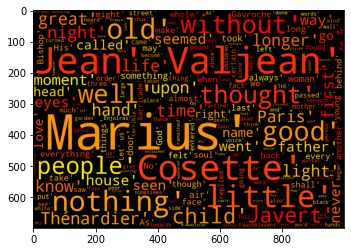

In [27]:
wordcloud = WordCloud(width = 1000, height = 700, 
                background_color ='black', colormap=plt.cm.autumn,
                min_font_size = 10).generate(str(filtered_book4))
plt.imshow(wordcloud)

This wordcloud doest not have Victor Hugo Statue because here only we have read the text and the image of victor hugo is not been read.

Now we will change the characteristics of the word cloud, colours, size, paddings, etc. To mix a word cloud with an image, we need the image that will be used as a mask ( https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Victor_Hugo_Buste_David_27122012.jpg/496px-Victor_Hugo_Buste_David_27122012.jpg) and to pass the mask as an extra parameter to the command that generates the word cloud. 


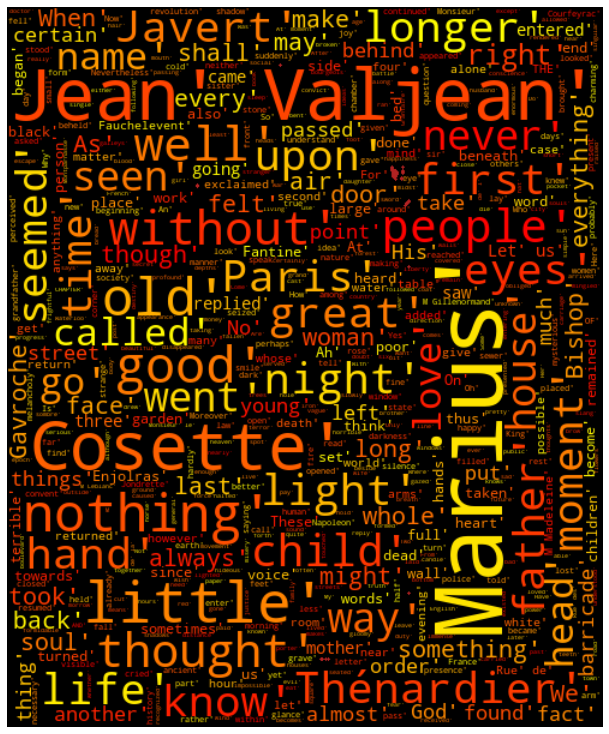

In [28]:
#read the mask image
victor_mask = np.array(Image.open("496px-Victor_Hugo_Buste_David_27122012.png"))

# Transform your mask into a new one that will work with the function:
transformed_victor_mask = np.ndarray((victor_mask.shape[0],victor_mask.shape[1]), np.int32)

# for i in range(len(victor_mask)):
#      print(victor_mask[i])
#      transformed_victor_mask[i] = transform_format(victor_mask[i])
    
# changing few arguments
wordcloud = WordCloud(background_color="black", max_words=1000, mask=victor_mask,colormap=plt.cm.autumn,

                contour_width=3, contour_color='firebrick').generate(str(filtered_book4))

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
# plt.imshow(wordcloud)

Now, to count specific words, we have to define those words. Let's try to count the occurrences of the main characters of the book.  Thus,  we need to define the characters

In [29]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 
numCharacters = len(character_list)

There is a huge number of caveats of this part of the analysis. For instance:

the name Thénardier is taken as a single instance, whilst it can cover either Madame or Monsieur Thénardier.
The Bishop Myriel is sometimes referred as Myriel and sometimes as Bishop
Petit Gervais and St Gervais will be confused as well.

A more sophisticated analysis would distinguish some of these by taking bi-grams (pairs of words) and distinguishing between these. More subtle caveats:

The Bishop or any other character may be referred in a thought and it does not mean it was present in a scene.

 
Those distinctions are outside the scope of the present notebook, which aims to illustrate the process of extraction of interactions between characters from a book. Notice that more sophisticated character maps, such as the very popular one created by Donald Knuth is also subject to criticism

With the list of characters, find how many times each of them appears in the text.


In [30]:
#character occurances in a dictionary format to see how many times a character appears in a text 
numOccurancesDict = dict((char,word_tokens.count(char)) for char in character_list)   
numOccurancesDict   

{'Myriel': 28,
 'Bishop': 260,
 'Baptistine': 27,
 'Magloire': 76,
 'Cravatte': 3,
 'Valjean': 1096,
 'Gervais': 25,
 'Fantine': 200,
 'Tholomyès': 60,
 'Blachevelle': 27,
 'Dahlia': 19,
 'Fameuil': 11,
 'Favourite': 42,
 'Listolier': 11,
 'Zéphine': 16,
 'Cosette': 987,
 'Thénardier': 520,
 'Éponine': 80,
 'Azelma': 21,
 'Javert': 443,
 'Fauchelevent': 284,
 'Bamatabois': 4,
 'Champmathieu': 46,
 'Brevet': 23,
 'Simplice': 28,
 'Chenildieu': 14,
 'Cochepaille': 14,
 'Innocente': 2,
 'Reverend': 10,
 'Ascension': 3,
 'Crucifixion': 13,
 'Gavroche': 300,
 'Magnon': 28,
 'Gillenormand': 230,
 'Marius': 1327,
 'Colonel': 20,
 'Mabeuf': 87,
 'Enjolras': 247,
 'Combeferre': 88,
 'Prouvaire': 28,
 'Feuilly': 26,
 'Courfeyrac': 182,
 'Bahorel': 36,
 'Lesgle': 3,
 'Joly': 36,
 'Grantaire': 83,
 'Patron-Minette': 5,
 'Brujon': 57,
 'Toussaint': 52}

In [31]:
#list to get the count of the characters 
numOccurances = []
for char in character_list:
    numOccurances.append(word_tokens.count(char))
numOccurances

[28,
 260,
 27,
 76,
 3,
 1096,
 25,
 200,
 60,
 27,
 19,
 11,
 42,
 11,
 16,
 987,
 520,
 80,
 21,
 443,
 284,
 4,
 46,
 23,
 28,
 14,
 14,
 2,
 10,
 3,
 13,
 300,
 28,
 230,
 1327,
 20,
 87,
 247,
 88,
 28,
 26,
 182,
 36,
 3,
 36,
 83,
 5,
 57,
 52]

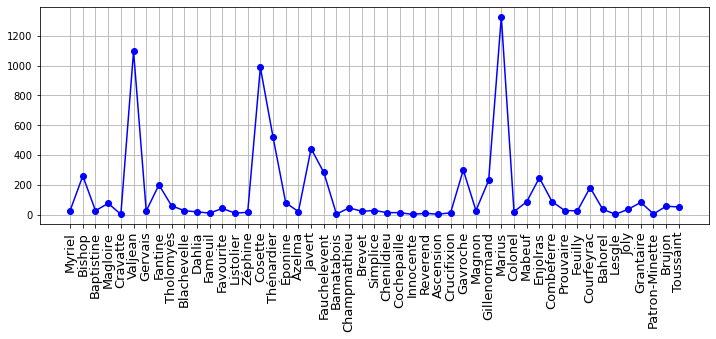

In [32]:
#plotting the occurances of each character
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(111)
plt.plot(numOccurances,'b-o')
plt.xticks(np.arange(0,numCharacter),character_list)
plt.grid()
ax.tick_params(axis = 'x' , rotation=90,labelsize = 13)

Further, can we find *where* in the text each character appears?

In [33]:
#list to get positions of characters 
positions_characters = []
for char in character_list:
    positions_characters.append(word_tokens.index(char))
positions_characters

[3151,
 3153,
 4020,
 4051,
 14901,
 33507,
 55880,
 61979,
 61901,
 61925,
 61954,
 61917,
 61941,
 61909,
 61970,
 2980,
 73043,
 77715,
 77757,
 2930,
 86282,
 93786,
 2909,
 51417,
 104415,
 102355,
 102353,
 238670,
 252979,
 253085,
 251682,
 2945,
 282478,
 279916,
 279864,
 59681,
 286747,
 303374,
 303376,
 303379,
 303381,
 303383,
 303385,
 303387,
 303391,
 303393,
 339487,
 339507,
 408446]

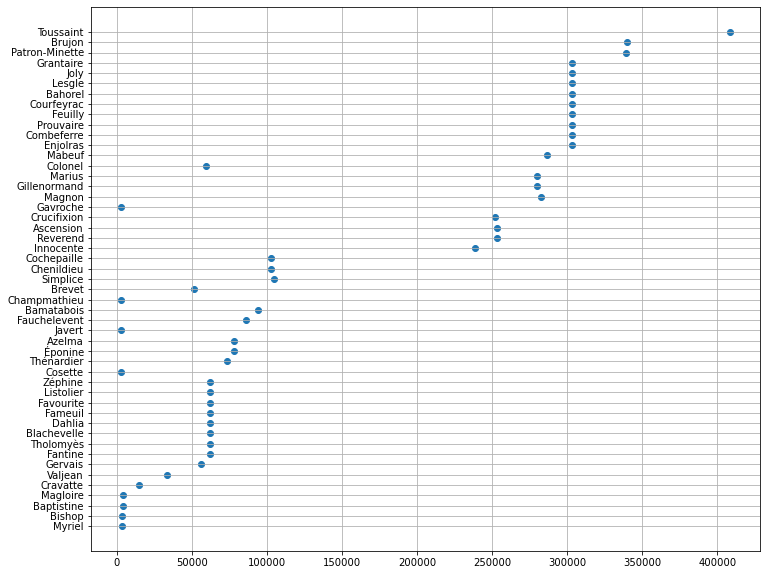

In [34]:
#plotting the occurances of each character
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111)
plt.scatter(positions_characters,character_list)
# plt.xticks(np.arange(0,numCharacter),character_list)
plt.grid()
# ax.tick_params(axis = 'x' , rotation=90,labelsize = 13)